<a href="https://colab.research.google.com/github/dweinflash/CS293B_Cloud/blob/master/upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -q git+https://github.com/tensorflow/examples.git#egg=tensorflow-examples[model_maker]

     |████████████████████████████████| 525.1MB 30kB/s 
     |████████████████████████████████| 768kB 48.5MB/s 
     |████████████████████████████████| 1.1MB 45.1MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 266kB 61.9MB/s 
     |████████████████████████████████| 2.9MB 48.5MB/s 
     |████████████████████████████████| 460kB 57.9MB/s 
     |████████████████████████████████| 174kB 64.5MB/s 
     |████████████████████████████████| 21.6MB 1.4MB/s 
     |████████████████████████████████| 92kB 13.6MB/s 
     |████████████████████████████████| 358kB 56.1MB/s 
     |████████████████████████████████| 296kB 63.5MB/s 


In [ ]:
import os
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

In [ ]:
# Print number of images per category
drive_folder = "drive/My Drive/Colab Notebooks/CS293B/TrainImages/"
categories = ["Rock", "Paper", "Scissors"]

for elem in categories:
  path, dirs, files = next(os.walk(drive_folder+elem))
  file_count = len(files)
  print(elem + ": " + str(file_count))

Rock: 1200
Paper: 1200
Scissors: 1200


In [ ]:
# Process and categorize images
images = os.path.abspath('drive/My Drive/Colab Notebooks/CS293B/TestImages')
data = ImageClassifierDataLoader.from_folder(images)

# Split into train, validation and test sets
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 2700, num_label: 3, labels: Paper, Rock, Scissors.


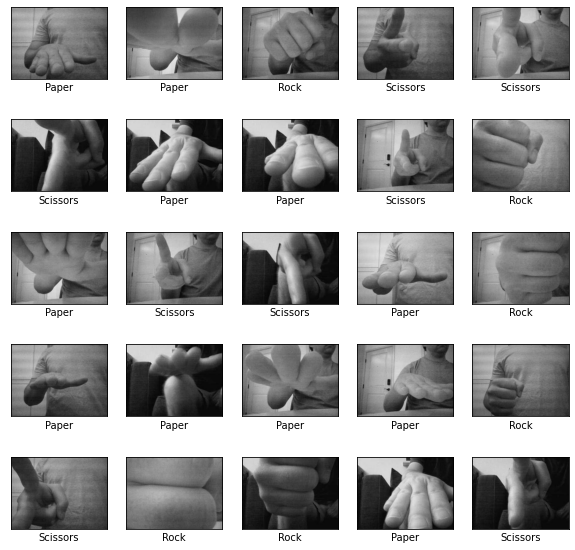

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
# Train model
model = image_classifier.create(train_data, validation_data=validation_data)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________
None
INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Epoch 1/5
67/67 [==============================] - 946s 14s/step - loss: 0.5988 - accuracy: 0.8363 - val_loss: 0.4307 - val_accuracy: 0.9414
Epoch 2/5
67/67 [==============================] - 15s 229ms/step - loss: 0.4114 - accuracy: 0.9697 - val_loss: 0.3943 - val_accuracy: 0.9844
Epoch 3/5
67/67 [==============================] - 15s 229ms/step - loss: 0.3899 - accuracy: 0.9771 - val_loss: 0.3762 - val_accuracy: 0.9922
Epoch 4/5
67/67 [==============================] - 15s 224ms/step - loss: 0.3752 - accuracy: 0.9837 - val_loss: 0.3679 - val_accuracy: 0.9922
Epoch 5/5
67/67 [==============================] - 16s 243ms/step - loss: 0.3683 - accuracy: 0.9879 - val_loss: 0.3600 - val_accuracy: 0.9922


In [ ]:
# Validation
validation_score = model.evaluate(validation_data)

9/9 [==============================] - 1s 121ms/step - loss: 0.3587 - accuracy: 0.9926


In [ ]:
# Model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 3843      
Total params: 3,416,867
Trainable params: 3,843
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(test_data)

9/9 [==============================] - 94s 10s/step - loss: 0.3646 - accuracy: 0.9852


In [ ]:
# Export model
model.export(export_dir='.')

INFO:tensorflow:Saving labels in ./labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmpdc3e0br3/assets


INFO:tensorflow:Assets written to: /tmp/tmpdc3e0br3/assets
